In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds # notice shape, unit, key, etc...

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# my turn: lets do the usual immediate explorations including the categorical vars
diamonds['carat'].describe()


count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [4]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [5]:
diamonds['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [6]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [8]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
# my turn: explore carats - how many are 0.99 vs 1 carat? why?
diamondscarat = diamonds.query('carat==1')
diamondscarat.describe()

,carat,depth,table,price,x,y,z
count,1558.0,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,1.0,62.002311,58.575931,5241.589859,6.375796,6.364326,3.946694
std,0.0,2.197951,2.629606,1603.939049,0.193294,0.198106,0.164384
min,1.0,43.000000,49.000000,1681.000000,0.000000,0.000000,0.000000
25%,1.0,60.800000,57.000000,4155.000000,6.320000,6.310000,3.900000
50%,1.0,62.200000,59.000000,4864.000000,6.380000,6.380000,3.960000
75%,1.0,63.200000,60.000000,6073.000000,6.440000,6.440000,4.000000
max,1.0,70.200000,68.000000,16469.000000,6.770000,6.720000,4.380000


In [10]:
diamondscarat2 = diamonds.query('carat==.99')
diamondscarat2.describe()

,carat,depth,table,price,x,y,z
count,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,9.900000e-01,62.639130,58.043478,4406.173913,6.360435,6.336087,3.969565
std,3.405525e-16,3.894371,3.197702,1318.987720,0.160382,0.209344,0.135125
min,9.900000e-01,55.000000,54.000000,1789.000000,5.940000,5.800000,3.680000
25%,9.900000e-01,61.050000,56.000000,3465.000000,6.315000,6.340000,3.905000
50%,9.900000e-01,62.100000,57.000000,4780.000000,6.360000,6.380000,3.950000
75%,9.900000e-01,62.800000,58.500000,5479.000000,6.440000,6.440000,3.985000
max,9.900000e-01,73.600000,67.000000,6094.000000,6.720000,6.670000,4.350000


Way more 1 carat. They sell for more

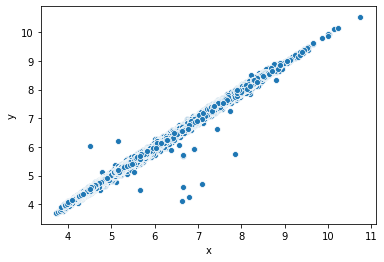

In [16]:
# explore dist of x, y, z: what did you learn? which is width, length, depth?
sns.scatterplot(data=diamonds.query('y < 15 & x > 2.5'),x='x',y='y')

x is width, y is length, z is depth

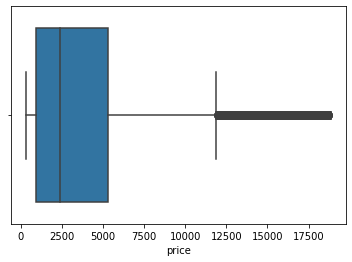

In [12]:
# your turn: explore price - is there anything unusual? (HINT: try many bin widths)
sns.boxplot(data=diamonds,x='price')

Price data is very skewed. We see very high prices over 10,000 but half of the prices are under 2,500

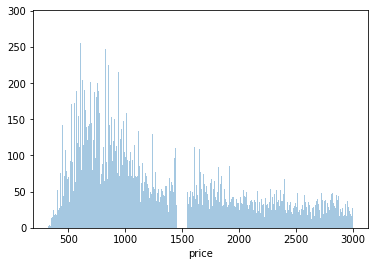

In [15]:
sns.distplot(diamonds.query('price<3000')['price'],kde=False, bins=500)

There seem to be prices that are much more common, aka price points. There seems to be some missing data (look around 1500)

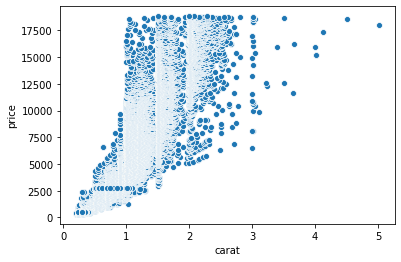

In [13]:
# my turn: how is carat related to price?

sns.scatterplot(x=diamonds['carat'],y=diamonds['price'])

A higher carat typically means a higher price. However, keep in mind there are other factors that influence price.

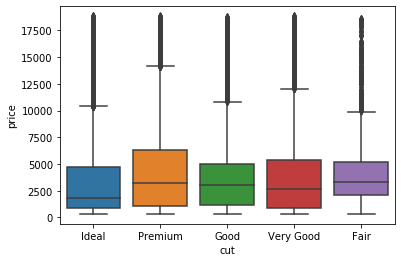

In [14]:
# your turn: how is price related to cut?
sns.boxplot(x=diamonds['cut'],y=diamonds['price'])


Ideal has the lowest median price while premium and fair have the highest median prices. 

In [17]:
# how should we deal with outliers? delete obs? replace with nan? winsorize? show each...

We could query as seen in the price example.

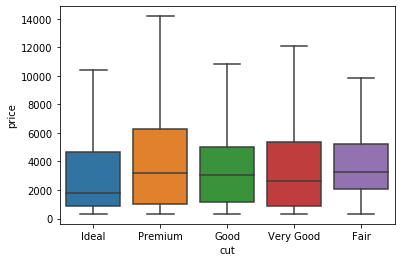

In [18]:
# we can also use showfliers. For example:
sns.boxplot(x=diamonds['cut'],y=diamonds['price'],showfliers= False)

In [21]:
# replace outliers with the median
print(diamonds['price'].quantile(0.50)) 
print(diamonds['price'].quantile(0.95)) 
diamonds['price'] = np.where(diamonds['price'] > 13107, 2401, diamonds['price'])
diamonds.describe()

2401.0
9821.0


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3267.451835,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,2919.458357,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,4662.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,13107.000000,10.740000,58.900000,31.800000
